<a href="https://colab.research.google.com/github/AminaZahid/Autism-Classification-Using-ML-and-DL-Algos/blob/main/Autism_Classification_Using_ML_and_DL_Algos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
data = pd.read_csv('/content/drive/MyDrive/Autism_Data.arff')
data.head(4)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         704 non-null    int64 
 1   A2_Score         704 non-null    int64 
 2   A3_Score         704 non-null    int64 
 3   A4_Score         704 non-null    int64 
 4   A5_Score         704 non-null    int64 
 5   A6_Score         704 non-null    int64 
 6   A7_Score         704 non-null    int64 
 7   A8_Score         704 non-null    int64 
 8   A9_Score         704 non-null    int64 
 9   A10_Score        704 non-null    int64 
 10  age              704 non-null    object
 11  gender           704 non-null    object
 12  ethnicity        704 non-null    object
 13  jundice          704 non-null    object
 14  austim           704 non-null    object
 15  contry_of_res    704 non-null    object
 16  used_app_before  704 non-null    object
 17  result           704 non-null    in

<Axes: >

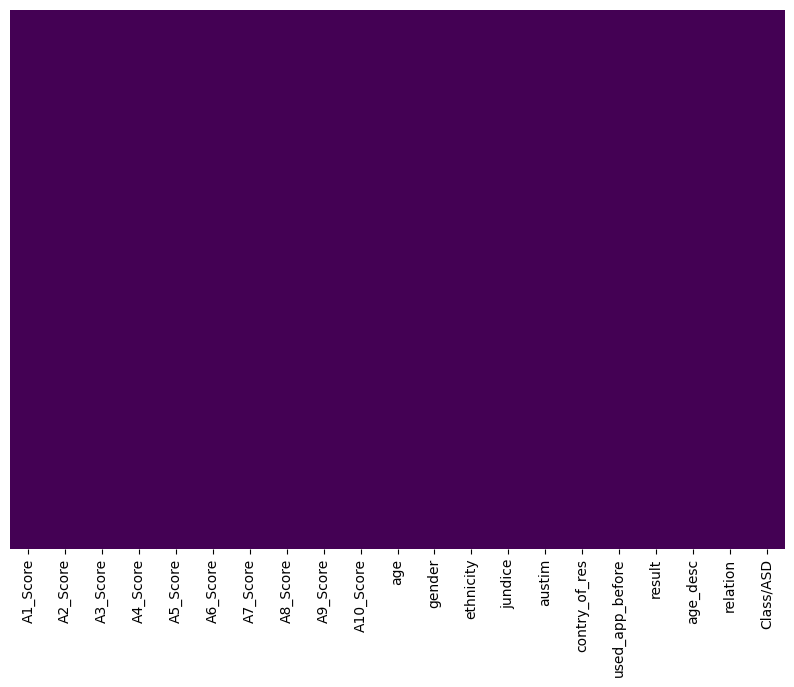

In [8]:
plt.figure(figsize=(10,7))
sns.heatmap(data.isnull(),cmap="viridis",cbar=False,yticklabels=False)

In [9]:
data.replace("?",np.nan,inplace=True)

<Axes: >

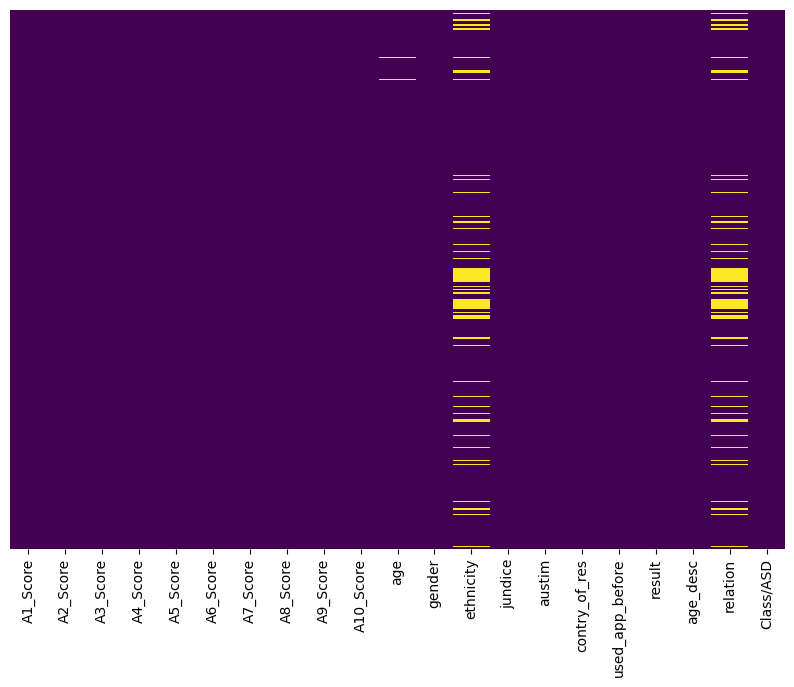

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(data.isnull(),cmap="viridis",cbar=False,yticklabels=False)

In [11]:
data=data.drop('used_app_before',axis=1)

<Axes: >

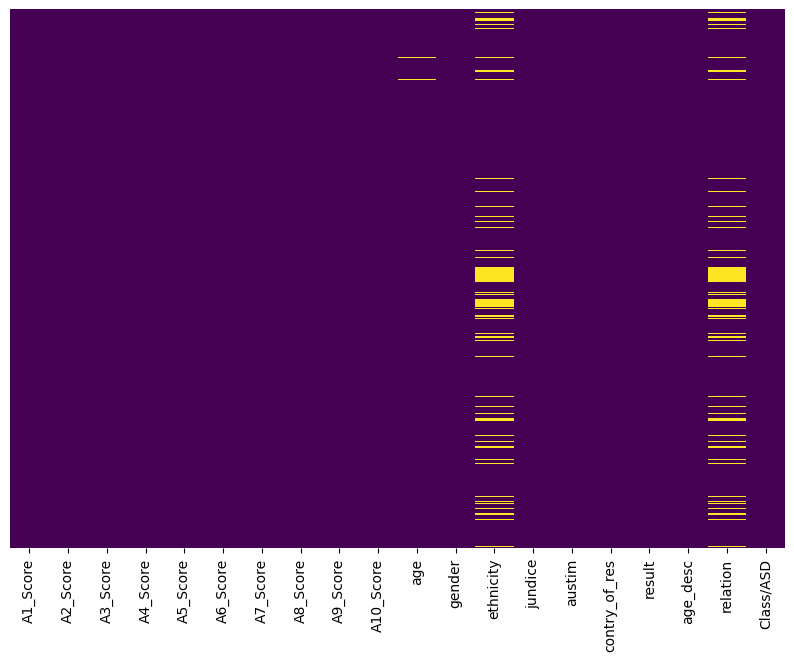

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(data.isnull(),cmap="viridis",cbar=False,yticklabels=False)

In [13]:
data['age']=data['age'].apply(lambda x:float(x))
data['age'].max()

383.0

<ipython-input-14-cfa695e52629>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_p['age'],bins=50,kde=False)


<Axes: xlabel='age'>

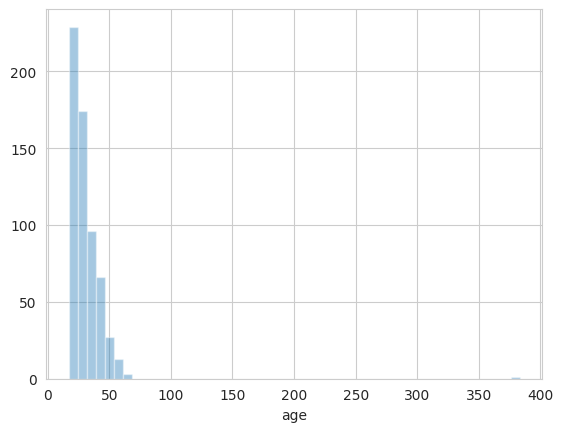

In [14]:
data_p=data
data_p.dropna(inplace=True)
sns.set_style('whitegrid')
sns.distplot(data_p['age'],bins=50,kde=False)

In [15]:
data_t=data_p[data_p['age']!=383]
data_t['age'].mean()

29.63486842105263

<Axes: >

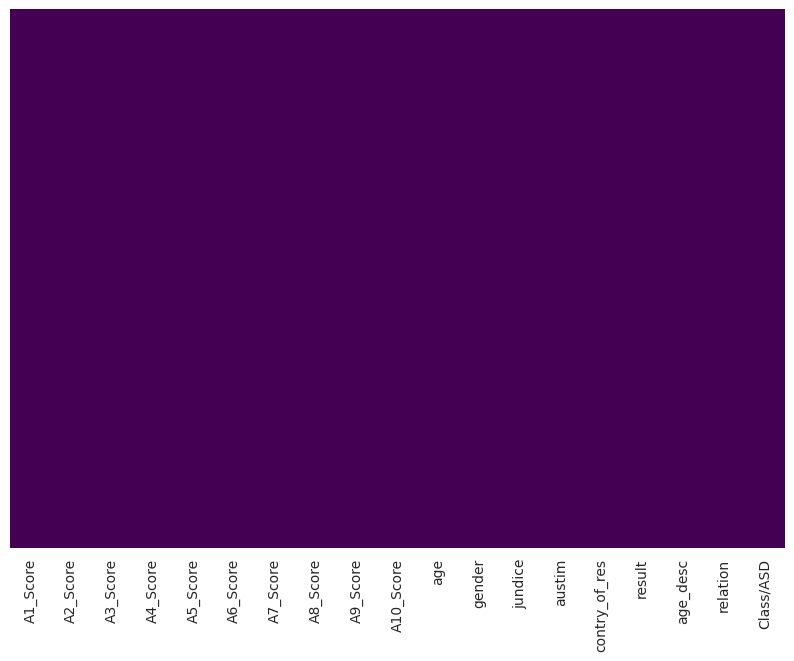

In [16]:
data.loc[data.age == 383, 'age'] = 30
data['age']=data['age'].fillna(30)
data=data.drop('ethnicity',axis=1)
plt.figure(figsize=(10,7))
sns.heatmap(data.isnull(),cmap="viridis",cbar=False,yticklabels=False)

In [17]:
data.drop(['contry_of_res','age_desc','relation'],axis=1,inplace=True)
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,result,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,no,no,6,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,no,yes,5,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,yes,yes,8,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,no,yes,6,NO
5,1,1,1,1,1,0,1,1,1,1,36.0,m,yes,no,9,YES


In [18]:
sex=pd.get_dummies(data['gender'],drop_first=True)
jaund=pd.get_dummies(data['jundice'],drop_first=True,prefix="Had_jaundice")
rel_autism=pd.get_dummies(data['austim'],drop_first=True,prefix="Rel_had")
detected=pd.get_dummies(data['Class/ASD'],drop_first=True,prefix="Detected")
data=data.drop(['gender','jundice','austim','Class/ASD'],axis=1)
data_featured=pd.concat([data,sex,jaund,rel_autism,detected],axis=1)
data_featured.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,m,Had_jaundice_yes,Rel_had_yes,Detected_YES
0,1,1,1,1,0,0,1,1,0,0,26.0,6,0,0,0,0
1,1,1,0,1,0,0,0,1,0,1,24.0,5,1,0,1,0
2,1,1,0,1,1,0,1,1,1,1,27.0,8,1,1,1,1
3,1,1,0,1,0,0,1,1,0,1,35.0,6,0,0,1,0
5,1,1,1,1,1,0,1,1,1,1,36.0,9,1,1,0,1


<ipython-input-19-6d2ba1012232>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_featured['age'],bins=50,kde=False)


<Axes: xlabel='age'>

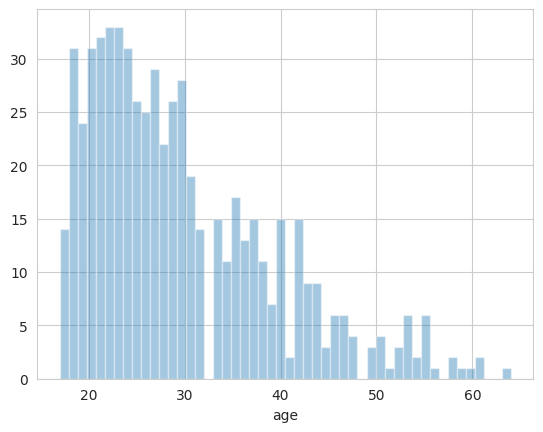

In [19]:
sns.distplot(data_featured['age'],bins=50,kde=False)

<Axes: xlabel='Detected_YES', ylabel='count'>

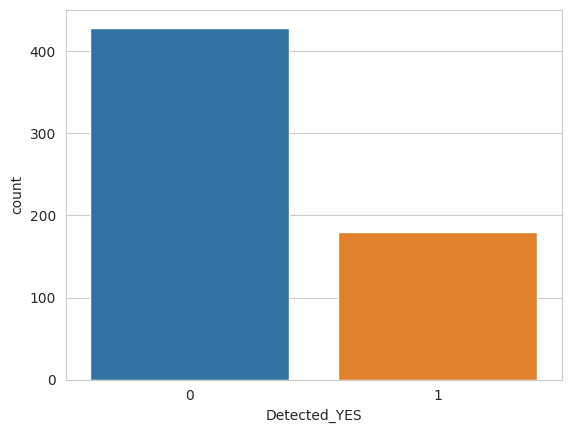

In [20]:
sns.countplot(x='Detected_YES',data=data_featured)

<Axes: xlabel='Detected_YES', ylabel='count'>

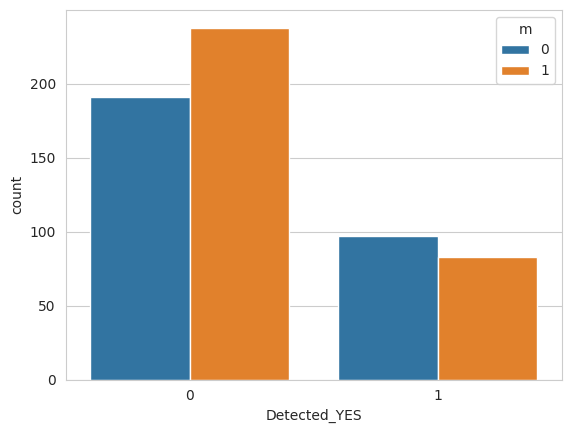

In [21]:
sns.countplot(x='Detected_YES',hue="m",data=data_featured)

<Axes: xlabel='Detected_YES', ylabel='count'>

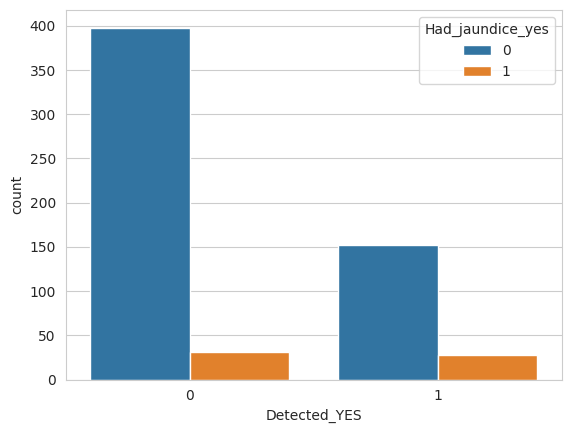

In [22]:
sns.countplot(x='Detected_YES',hue="Had_jaundice_yes",data=data_featured)

<Axes: xlabel='Detected_YES', ylabel='count'>

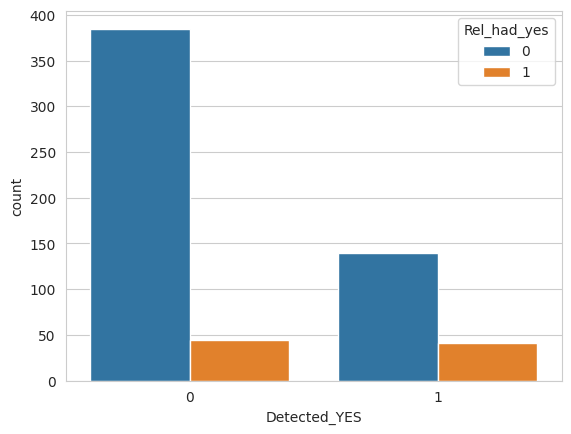

In [23]:
sns.countplot(x='Detected_YES',hue="Rel_had_yes",data=data_featured)

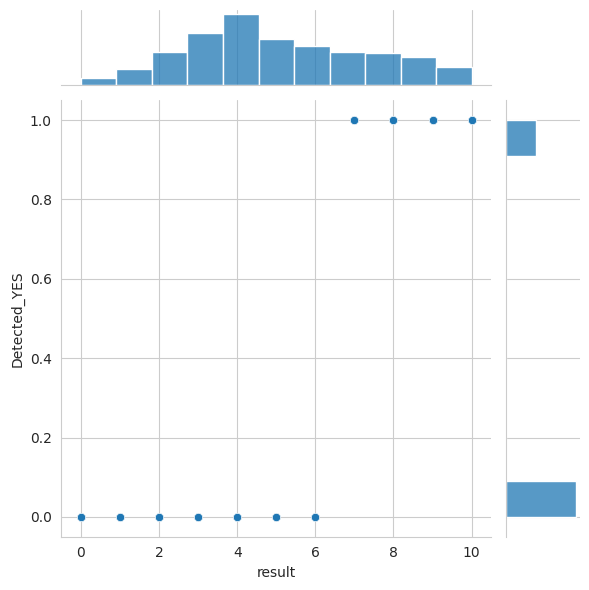

In [24]:
sns.jointplot(x="result",y="Detected_YES",data=data_featured)

In [25]:
X=data_featured[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result', 'm',
       'Had_jaundice_yes', 'Rel_had_yes']]
y=data_featured['Detected_YES']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
from sklearn.linear_model import LogisticRegression

In [28]:
lgr=LogisticRegression()
lgr.fit(X_train,y_train)
pred=lgr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test,y_pred=pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      1.00      1.00        36

    accuracy                           1.00       122
   macro avg       1.00      1.00      1.00       122
weighted avg       1.00      1.00      1.00       122



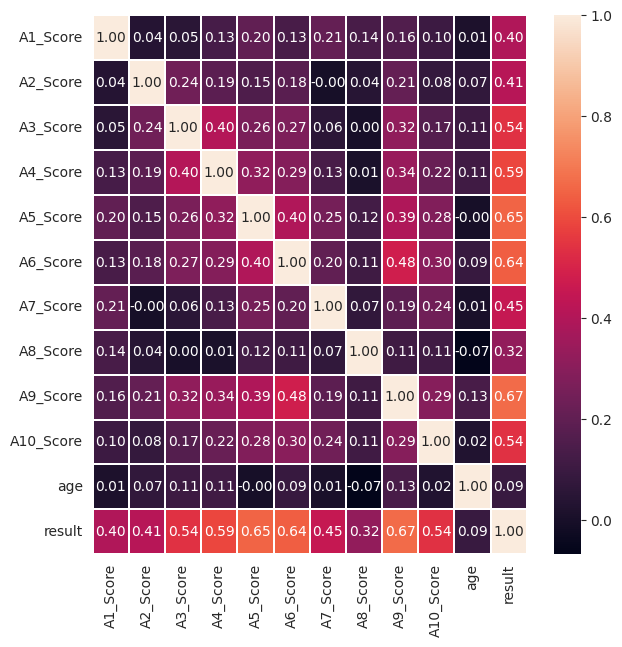

In [37]:
#heatmap

f,ax = plt.subplots(figsize = (7, 7))
sns.heatmap(data.corr(), annot = True, linewidths = .1, fmt = '.2f')
plt.show()

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
# SVM Classifier

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc_model = SVC()
svc_model.fit(X_train,y_train)
svc_pred = svc_model.predict(X_test)

#Summary of the predictions made by the classifier
print(classification_report(y_test, svc_pred))
print(confusion_matrix(y_test, svc_pred))
print("ACC: ",accuracy_score(svc_pred,y_test))


svc_score = accuracy_score(svc_pred,y_test)*100
print('Overall Accuracy of SVM:',svc_score)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97        86
           1       0.97      0.86      0.91        36

    accuracy                           0.95       122
   macro avg       0.96      0.92      0.94       122
weighted avg       0.95      0.95      0.95       122

[[85  1]
 [ 5 31]]
ACC:  0.9508196721311475
Overall Accuracy of SVM: 95.08196721311475


In [42]:
# Logistic Regression



LR = LogisticRegression()
LR.fit(X_train,y_train)

lr_pred = LR.predict(X_test)

#Summary of the predictions made by the classifier
print(classification_report(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))
print("ACC: ",accuracy_score(lr_pred,y_test))


lr_score=accuracy_score(lr_pred,y_test)*100

print('Overall Accuracy of Logistic Regression:',lr_score)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      1.00      1.00        36

    accuracy                           1.00       122
   macro avg       1.00      1.00      1.00       122
weighted avg       1.00      1.00      1.00       122

[[86  0]
 [ 0 36]]
ACC:  1.0
Overall Accuracy of Logistic Regression: 100.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
# Decision Tree

DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)

dt_pred = DT.predict(X_test)

#Summary of the predictions made by the classifier

print(classification_report(y_test, dt_pred))

print(confusion_matrix(y_test, dt_pred))
print("ACC: ",accuracy_score(dt_pred,y_test))



dt_score=accuracy_score(dt_pred,y_test)*100


print('Overall Accuracy of Decision Tree:',dt_score)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      1.00      1.00        36

    accuracy                           1.00       122
   macro avg       1.00      1.00      1.00       122
weighted avg       1.00      1.00      1.00       122

[[86  0]
 [ 0 36]]
ACC:  1.0
Overall Accuracy of Decision Tree: 100.0


In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
# Random Forest

RF = RandomForestClassifier()
RF.fit(X_train,y_train)

rf_pred = RF.predict(X_test)

#Summary of the predictions made by the classifier

print(classification_report(y_test, rf_pred))

print(confusion_matrix(y_test, rf_pred))
print("ACC: ",accuracy_score(rf_pred,y_test))

rf_score=accuracy_score(rf_pred,y_test)*100

print('Overall Accuracy of Random Forest:',rf_score)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      1.00      1.00        36

    accuracy                           1.00       122
   macro avg       1.00      1.00      1.00       122
weighted avg       1.00      1.00      1.00       122

[[86  0]
 [ 0 36]]
ACC:  1.0
Overall Accuracy of Random Forest: 100.0


In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
from sklearn.neural_network import MLPClassifier
# Naive Bayes

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train,y_train)
naive_bayes_pred = naive_bayes_model.predict(X_test)

#Summary of the predictions made by the classifier

print(classification_report(y_test, naive_bayes_pred))

print(confusion_matrix(y_test, naive_bayes_pred))
print("ACC: ",accuracy_score(naive_bayes_pred,y_test))

naive_bayes_score = accuracy_score(naive_bayes_pred,y_test)*100
print('Overall Accuracy of Naive Bayes:',naive_bayes_score)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        86
           1       0.94      0.94      0.94        36

    accuracy                           0.97       122
   macro avg       0.96      0.96      0.96       122
weighted avg       0.97      0.97      0.97       122

[[84  2]
 [ 2 34]]
ACC:  0.9672131147540983
Overall Accuracy of Naive Bayes: 96.72131147540983


In [51]:
clf = MLPClassifier(hidden_layer_sizes=(150,100,50),max_iter=300,activation = 'relu',solver='adam',random_state=1)
clf.fit(X_train, y_train)
    
mpl_pred = clf.predict(X_test)

#Summary of the predictions made by the classifier

print(classification_report(y_test, mpl_pred))

print(confusion_matrix(y_test, mpl_pred))
print("ACC: ",accuracy_score(mpl_pred,y_test))

mpl_pred_score = accuracy_score(mpl_pred,y_test)*100
print('Overall Accuracy of MLP:',mpl_pred_score)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        86
           1       0.97      1.00      0.99        36

    accuracy                           0.99       122
   macro avg       0.99      0.99      0.99       122
weighted avg       0.99      0.99      0.99       122

[[85  1]
 [ 0 36]]
ACC:  0.9918032786885246
Overall Accuracy of MLP: 99.18032786885246


In [52]:
from sklearn.neighbors import KNeighborsClassifier
# KNN 
k_range = range(1,26)
scores = []
for k in k_range :
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train,y_train)
    pred = KNN.predict(X_test)
    scores.append(accuracy_score(pred,y_test)*100)
    
print(pd.DataFrame(scores))

            0
0   95.901639
1   97.540984
2   96.721311
3   96.721311
4   95.901639
5   95.901639
6   96.721311
7   98.360656
8   97.540984
9   98.360656
10  95.901639
11  97.540984
12  96.721311
13  97.540984
14  97.540984
15  96.721311
16  95.901639
17  96.721311
18  96.721311
19  96.721311
20  96.721311
21  97.540984
22  96.721311
23  97.540984
24  97.540984


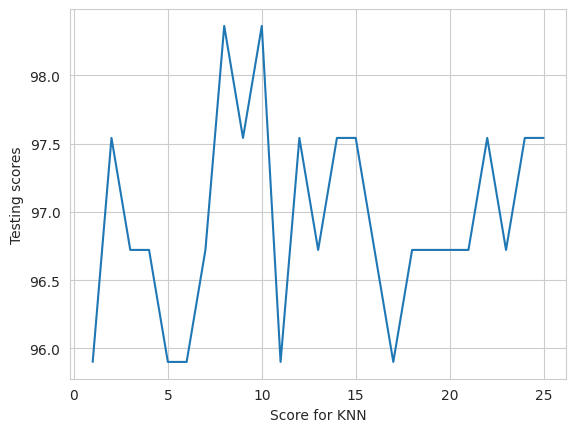

In [53]:
plt.plot(k_range,scores)
plt.xlabel("Score for KNN")
plt.ylabel("Testing scores")
plt.show()

In [54]:
from sklearn.linear_model import Perceptron

#Perceptron

clf = Perceptron()
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)

#Summary of the predictions made by the classifier

print(classification_report(y_test, clf_pred))

print(confusion_matrix(y_test, clf_pred))
print("ACC: ",accuracy_score(clf_pred,y_test))

clf_score = accuracy_score(clf_pred,y_test)*100
print('Overall Accuracy of Perceptron:',clf_score)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95        86
           1       0.86      0.89      0.88        36

    accuracy                           0.93       122
   macro avg       0.91      0.92      0.91       122
weighted avg       0.93      0.93      0.93       122

[[81  5]
 [ 4 32]]
ACC:  0.9262295081967213
Overall Accuracy of Perceptron: 92.62295081967213


<ipython-input-55-fd6a3ec1ceaa>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


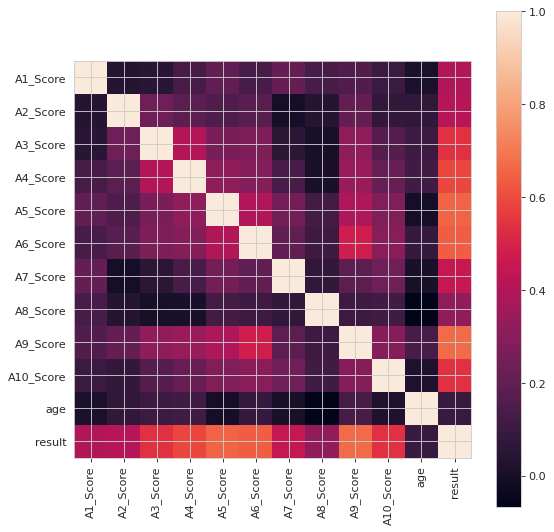

In [57]:
plotCorrelationMatrix(data, 8)

In [58]:
df1=data.copy()

In [65]:
from pandas.plotting import scatter_matrix

<ipython-input-68-36f292bfedaf>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


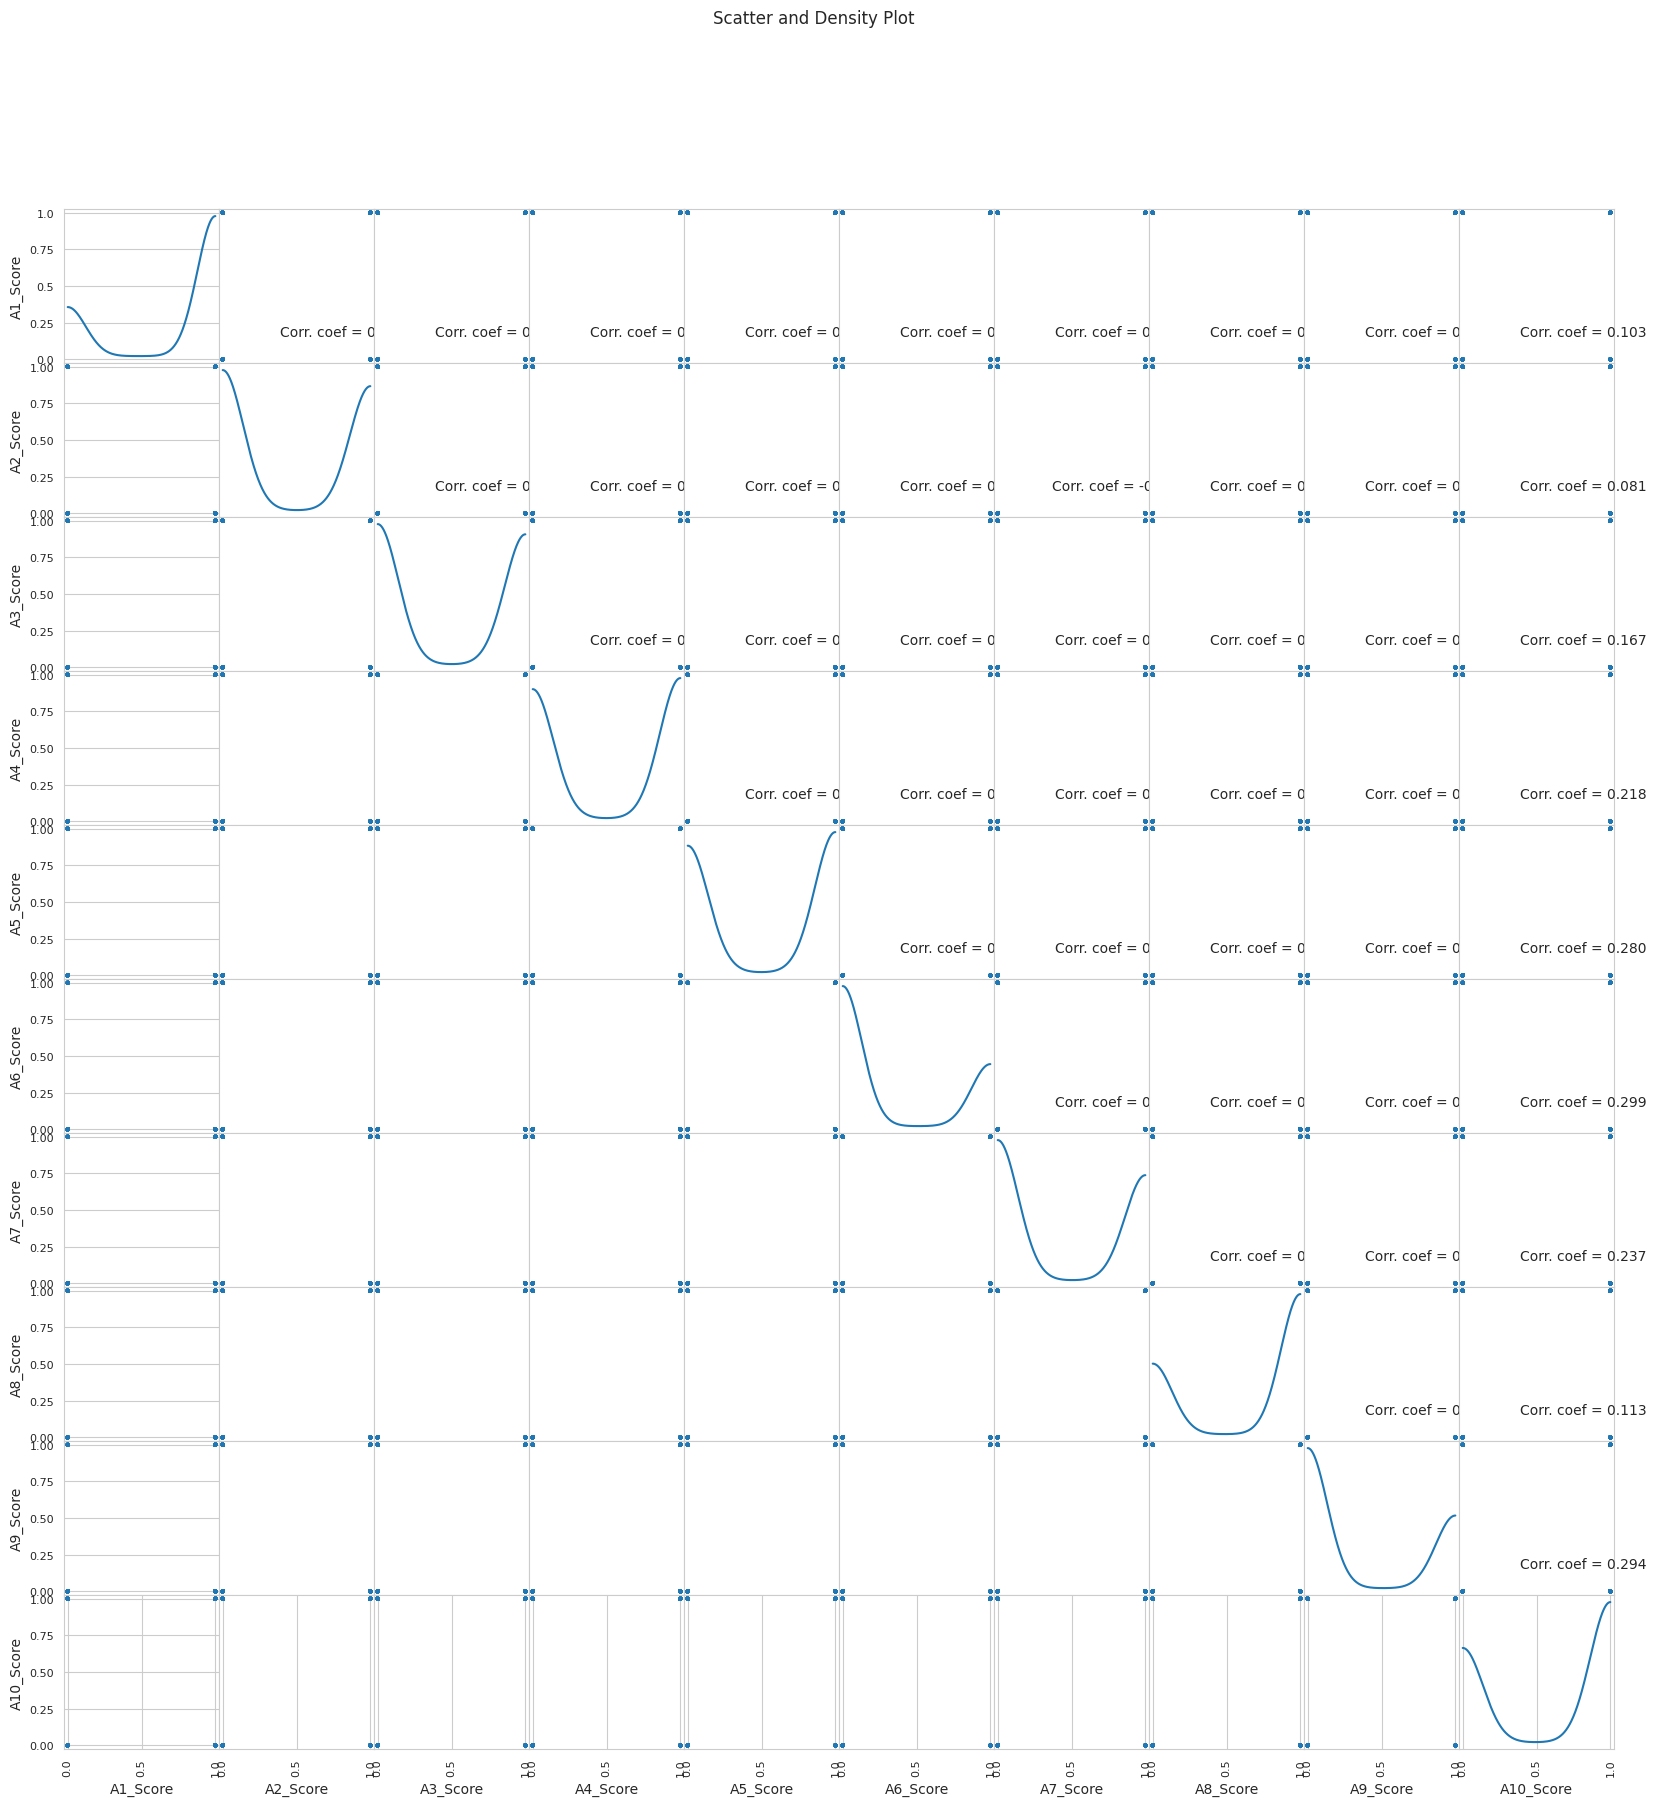

In [68]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
plotScatterMatrix(df1, 20, 10)

Confusion Matrix
[[86  0]
 [ 2 34]]


<ipython-input-70-cd47fea45f2b>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-70-cd47fea45f2b>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


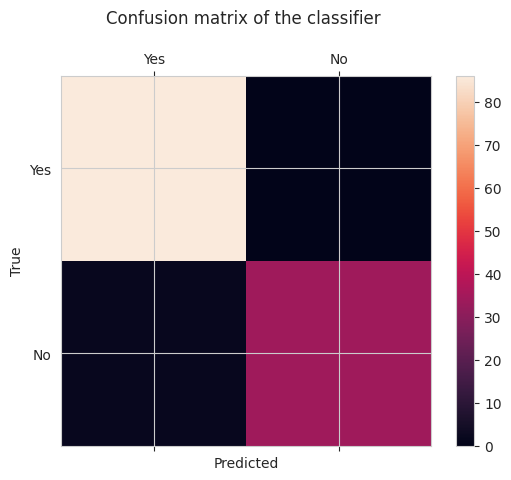

In [70]:
classifier=LogisticRegression(random_state=0,solver='liblinear',multi_class='auto')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm)
labels=['Yes','No']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier \n')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()